<a href="https://colab.research.google.com/github/quin-thifal/miscellaneous/blob/main/anyone_catch_up_to_max_in_2024%3F%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4

In [14]:
!pip install timezonefinder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.2 MB/s eta 0:00:00
  Created wheel for timezonefinder: filename=timezonefinder-6.5.0-cp310-cp310-manylinux_2_35_x86_64.whl size=49412386 sha256=56ac1c9f8f8e67788ced4eee942119f8b33b38b06d4e426fa939d3846c333d17
  Stored in directory: /root/.cache/pip/wheels/f2/ae/2d/8bb82cff928de1ce64feef734cf9ef78d84f026693fecc5617
Successfully built timezonefinder


In [109]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pytz
from timezonefinder import TimezoneFinder
import matplotlib.pyplot as plt
import numpy as np

In [110]:
# Send a GET request to the Wikipedia URL
url = "https://en.wikipedia.org/wiki/2024_Formula_One_World_Championship"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the section containing the desired sub-theme
section_heading = soup.find('span', {'id': 'World_Drivers.27_Championship_standings'})
section = section_heading.find_parent()

# Initialize lists to store data
data = []

# Extract all table rows under the sub-theme "World Drivers' Championship standings"
table = section.find_next('table', class_='wikitable')
if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all(['th', 'td'])
        if cells:
            data.append([cell.get_text(strip=True) for cell in cells])

# If the table header is not extracted properly, try to get the header from the first row
if not data:
    header_row = table.find('tr')
    header_cells = header_row.find_all(['th', 'td'])
    header = [cell.get_text(strip=True) for cell in header_cells]
    data.append(header)

# Convert the data into a pandas DataFrame
drivers_standing = pd.DataFrame(data[1:], columns=data[0])

# Remove the last two rows
drivers_standing = drivers_standing.drop([21, 22])

# Selecting the first, second, and last columns
drivers_standing = drivers_standing.iloc[:, [0, 1, -1]]

# Display the DataFrame
drivers_standing

,Pos.,Driver,Points
0,1,Max Verstappen,136
1,2,Sergio Pérez,103
2,3,Charles Leclerc,98
3,4,Lando Norris,83
4,5,Carlos Sainz Jr.,83
5,6,Oscar Piastri,41
6,7,George Russell,37
7,8,Fernando Alonso,33
8,9,Lewis Hamilton,27
9,10,Yuki Tsunoda,14


In [111]:
# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the section containing the desired sub-theme "Calendar"
section_heading = soup.find('span', {'id': 'Calendar'})
section = section_heading.find_parent()

# Initialize lists to store data
data = []

# Extract all table rows under the "Calendar" section
table = section.find_next('table', class_='wikitable')
if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all(['th', 'td'])
        if cells:
            data.append([cell.get_text(strip=True) for cell in cells])

# If the table header is not extracted properly, try to get the header from the first row
if not data:
    header_row = table.find('tr')
    header_cells = header_row.find_all(['th', 'td'])
    header = [cell.get_text(strip=True) for cell in header_cells]
    data.append(header)

# Convert the data into a pandas DataFrame
calendar = pd.DataFrame(data[1:], columns=data[0])

# Remove the last row
calendar = calendar.drop([24])

# Convert the race date to yyyy-mm-dd format
calendar['Race date'] = calendar['Race date'].apply(lambda x: datetime.strptime(x, '%d %B').replace(year=datetime.now().year).strftime('%Y-%m-%d'))

# Add a column titled "Type"
calendar['Type'] = calendar['Grand Prix'].apply(lambda x: 'Sprint' if any(keyword in x for keyword in ['China', 'Miami', 'Austria', 'United States', 'Brazil', 'Qatar']) else 'Race')

# Display the DataFrame
calendar

,Round,Grand Prix,Circuit,Race date,Type
0,1,Bahrain Grand Prix,"Bahrain International Circuit,Sakhir",2024-03-02,Race
1,2,Saudi Arabian Grand Prix,"Jeddah Corniche Circuit,Jeddah",2024-03-09,Race
2,3,Australian Grand Prix,"Albert Park Circuit,Melbourne",2024-03-24,Race
3,4,Japanese Grand Prix,"Suzuka International Racing Course,Suzuka",2024-04-07,Race
4,5,Chinese Grand Prix,"Shanghai International Circuit,Shanghai",2024-04-21,Race
5,6,Miami Grand Prix,"Miami International Autodrome,Miami Gardens, F...",2024-05-05,Sprint
6,7,Emilia Romagna Grand Prix,"Imola Circuit,Imola",2024-05-19,Race
7,8,Monaco Grand Prix,"Circuit de Monaco,Monaco",2024-05-26,Race
8,9,Canadian Grand Prix,"Circuit Gilles Villeneuve,Montreal",2024-06-09,Race
9,10,Spanish Grand Prix,"Circuit de Barcelona-Catalunya,Montmeló",2024-06-23,Race


In [112]:
# Function to get the user's location based on their IP address
def get_user_location():
    try:
        response = requests.get('https://ipinfo.io/json')
        data = response.json()
        return data.get('city'), data.get('region'), data.get('country'), data.get('loc')  # Return city, region, country, and location
    except Exception as e:
        print("Error getting user location:", e)
        return None, None, None, None

# Get the user's location and coordinates
city, region, country, location = get_user_location()
latitude, longitude = location.split(',')

# Get the user's timezone based on their coordinates
tf = TimezoneFinder()
user_timezone = pytz.timezone(tf.timezone_at(lng=float(longitude), lat=float(latitude)))

# Get the current time in the user's time zone
current_time = datetime.now(user_timezone)

# Extract the current date
current_date = current_time.date()

print(current_date)

2024-05-09


In [113]:
def find_next_race(calendar):
    current_date = pd.to_datetime(datetime.now().date())  # Current date as datetime64[ns]

    # Convert the 'Race date' column to datetime
    calendar['Race date'] = pd.to_datetime(calendar['Race date'])

    # Find the next race date
    next_race = calendar[calendar['Race date'] > current_date].sort_values(by='Race date').head(1)

    # Print the column of the next race
    if not next_race.empty:
        print("Next race details:")
        next_race = pd.DataFrame(next_race)
        display(next_race)
        return next_race
    else:
        print("No upcoming races.")
        return None

# Assuming you have the 'calendar' DataFrame
next_race_detail = find_next_race(calendar)

Next race details:


,Round,Grand Prix,Circuit,Race date,Type
6,7,Emilia Romagna Grand Prix,"Imola Circuit,Imola",2024-05-19,Race


In [114]:
def points_for_race_type(next_race_details):
    if next_race_details is not None:
        race_type = next_race_details['Type'].iloc[0]
        if race_type == 'Race':
          max_race = 26
          print("Points applied for race:", max_race)
          return max_race
        elif race_type == 'Sprint':
          max_sprint = 34
          print("Points applied for sprint:", max_sprint)
          return max_sprint
        else:
            print("Unknown race type.")
            return None
    else:
        print("No upcoming races.")
        return None

# Assuming you have the 'calendar' DataFrame
max_possible_points = points_for_race_type(next_race_detail)

Points applied for race: 26


In [115]:
# Convert "Points" column to integers
drivers_standing["Points"] = drivers_standing["Points"].astype(int)

# Add a column for max_possible_points
drivers_standing["Next Max Possible"] = drivers_standing["Points"] + max_possible_points

drivers_standing

,Pos.,Driver,Points,Next Max Possible
0,1,Max Verstappen,136,162
1,2,Sergio Pérez,103,129
2,3,Charles Leclerc,98,124
3,4,Lando Norris,83,109
4,5,Carlos Sainz Jr.,83,109
5,6,Oscar Piastri,41,67
6,7,George Russell,37,63
7,8,Fernando Alonso,33,59
8,9,Lewis Hamilton,27,53
9,10,Yuki Tsunoda,14,40


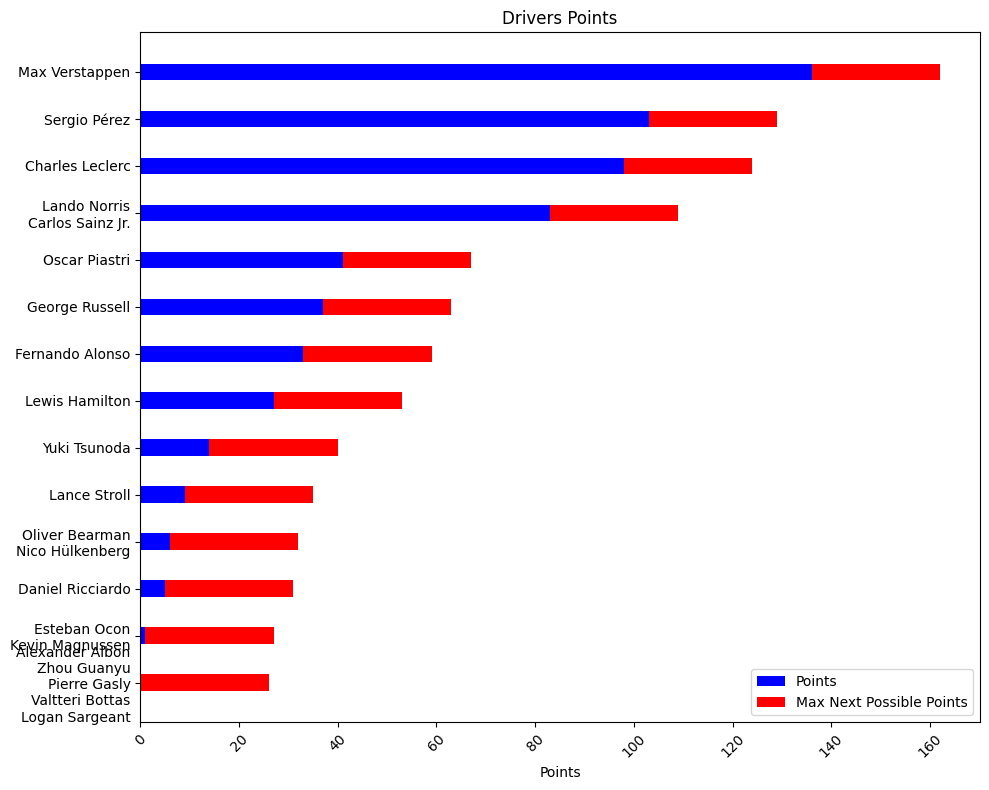

In [116]:
# Data
drivers = drivers_standing["Driver"]
points = drivers_standing["Points"]
max_possible_points = drivers_standing["Next Max Possible"]

# Group drivers with the same points
unique_points = list(set(points))
grouped_points = []
grouped_max_possible_points = []
grouped_drivers = []

for point in unique_points:
    indices = [i for i, x in enumerate(points) if x == point]
    grouped_points.append(point)
    grouped_max_possible_points.append(max(max_possible_points[i] for i in indices))
    grouped_drivers.append("\n".join(drivers[i] for i in indices))  # Use newline separator

# Sort the grouped data based on points in descending order
sorted_indices_grouped = np.argsort(grouped_points)[::-1]
grouped_drivers_sorted = [grouped_drivers[i] for i in sorted_indices_grouped]
grouped_points_sorted = [grouped_points[i] for i in sorted_indices_grouped]
grouped_max_possible_points_sorted = [grouped_max_possible_points[i] for i in sorted_indices_grouped]

# Number of drivers
n = len(grouped_drivers_sorted)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 8))

# Positions of the bars
y_pos = np.arange(n)

# Plotting the bars
bar_width = 0.35
bars1 = ax.barh(y_pos, grouped_points_sorted[::-1], bar_width, label='Points', color='b')  # Reverse the order
bars2 = ax.barh(y_pos, [grouped_max_possible_points_sorted[i]-grouped_points_sorted[i] for i in range(n)], bar_width, left=grouped_points_sorted[::-1], label='Max Next Possible Points', color='r')  # Reverse the order

# Adding labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped_drivers_sorted[::-1], fontsize=10)  # Reverse the order, reduce font size
ax.set_xlabel('Points')
ax.set_title('Drivers Points')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()